# Project 2 - Food Delivery System

by 23AIML056_Kavya

## Pre-requisites

In [28]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
# Loading the dataset

data = pd.read_csv("D:\\Datasets\\food_delivery.csv")
data.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [30]:
# Basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [31]:
# Shape of the dataset

data.shape

(500, 7)

In [32]:
# Dropping duplicate rows

data.drop_duplicates().sum()

UserID                                                           125250
Age                                                               19663
TotalOrders                                                       14857
AverageSpend                                                  153292.34
FavoriteCuisine       MexicanMexicanMexicanThaiItalianMexicanChinese...
DeliveryRating                                                   1879.7
AppUsageTimePerDay                                              46757.7
dtype: object

In [33]:
# Basic statistics of the dataset

data.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


### Conclusion:

- There are 500 rows in dataset
- Average user's age is 39 years
- The company is getting atleast 14 orders and atmost 47 orders
- The company is getting average 29 orders everyday

In [34]:
# Displaying the distribution of 'FavouriteCuisine' column

data["FavoriteCuisine"].value_counts()

FavoriteCuisine
Thai       108
Italian    106
Indian     104
Mexican     95
Chinese     87
Name: count, dtype: int64

In [ ]:
# Mapping 'FavoriteCuisine' to numerical values for analysis

data["FavoriteCuisine"] = data["FavoriteCuisine"].map(
    {"Thai": 0, "Italian": 1, "Indian": 2, "Mexican": 3, "Chinese": 4}
)

In [ ]:
# Displaying the distribution of 'FavouriteCuisine' column

data["FavoriteCuisine"].value_counts()

FavoriteCuisine
0    108
1    106
2    104
3     95
4     87
Name: count, dtype: int64

In [ ]:
# Correlation matrix of the dataset

corr = data.corr()
corr

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
UserID,1.000000,0.043303,0.081743,0.037925,0.022466,0.035729,0.023503
Age,0.043303,1.000000,0.044117,0.009313,0.009549,0.077397,0.041644
TotalOrders,0.081743,0.044117,1.000000,0.033607,-0.041441,-0.025495,-0.037582
AverageSpend,0.037925,0.009313,0.033607,1.000000,-0.134597,-0.056125,-0.065401
FavoriteCuisine,0.022466,0.009549,-0.041441,-0.134597,1.000000,0.017919,0.057123
DeliveryRating,0.035729,0.077397,-0.025495,-0.056125,0.017919,1.000000,0.032841
AppUsageTimePerDay,0.023503,0.041644,-0.037582,-0.065401,0.057123,0.032841,1.000000


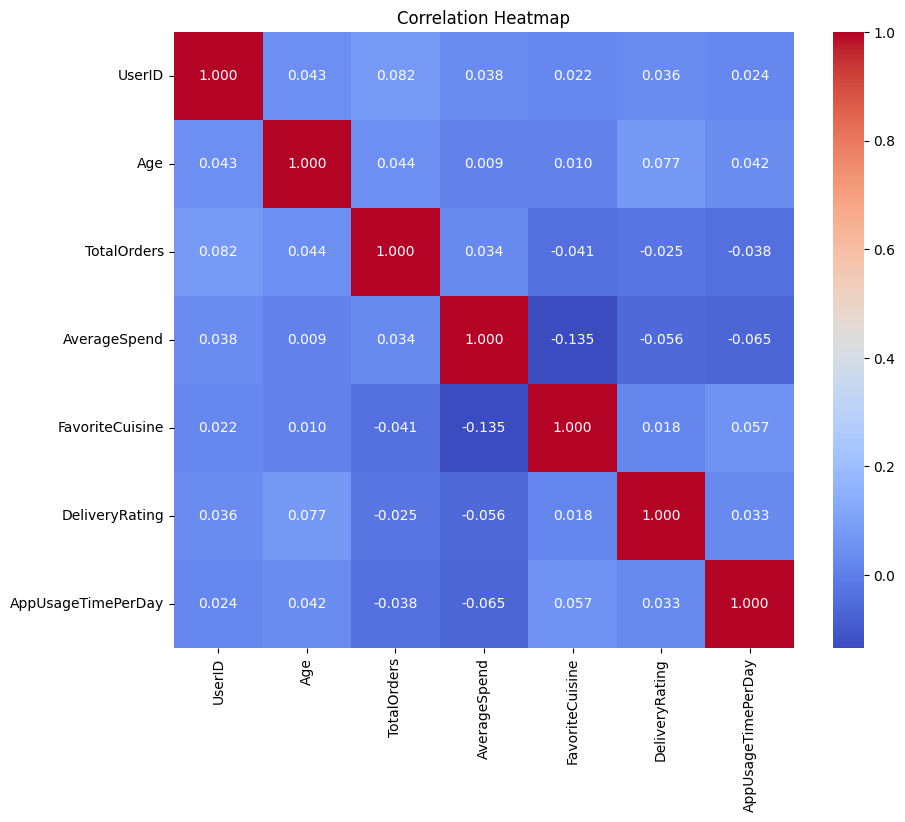

In [ ]:
# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

### Conclusion:

we will drop userid because it has no correlation

In [ ]:
# Dropping 'UserID' column as it has no correlation with other features

X = data.drop(["UserID"], axis=1)

In [ ]:
# Standardizing the features

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
# Shape of the standardized features

X_sc.shape

(500, 6)

In [ ]:
# Applying PCA to reduce dimensions to 2 for visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)

In [ ]:
# Shape of the PCA transformed features

X_pca.shape

(500, 2)

## KMeans Clustering

In [ ]:
# Applying KMeans clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

In [ ]:
# Adding KMeans labels to the DataFrame for analysis

kmeans_labels = pd.Series(kmeans_labels, name="KMeans Clusters")
kmeans_labels.value_counts()

KMeans Clusters
0    174
1    169
2    157
Name: count, dtype: int64

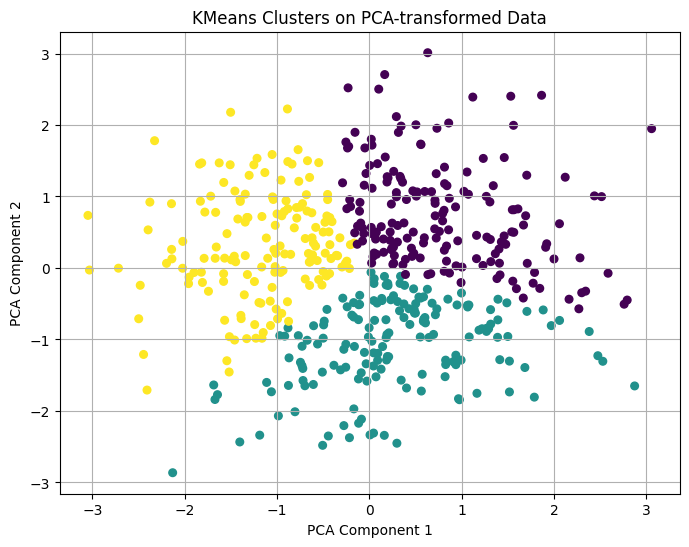

In [ ]:
# Visualizing KMeans clusters on PCA-transformed data

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="viridis", s=30)
plt.title("KMeans Clusters on PCA-transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### Conclusion:

- KMeans gave us three clean and distinct clusters. The groups are pretty compact and well-separated in the PCA plot, which suggests KMeans worked quite well on this dataset.
- It seems to handle the structure of the data nicely — especially when the data is evenly distributed and the number of clusters is known beforehand.

## Agglomerative Clustering

In [ ]:
# Applying Agglomerative Clustering

AgglomerativeClustering = AgglomerativeClustering(n_clusters=3)
agglo_labels = AgglomerativeClustering.fit_predict(X_pca)

In [ ]:
# Adding Agglomerative Clustering labels to the DataFrame for analysis

agglo_labels = pd.Series(agglo_labels, name="Agglomerative Clusters")
agglo_labels.value_counts()

Agglomerative Clusters
0    205
1    172
2    123
Name: count, dtype: int64

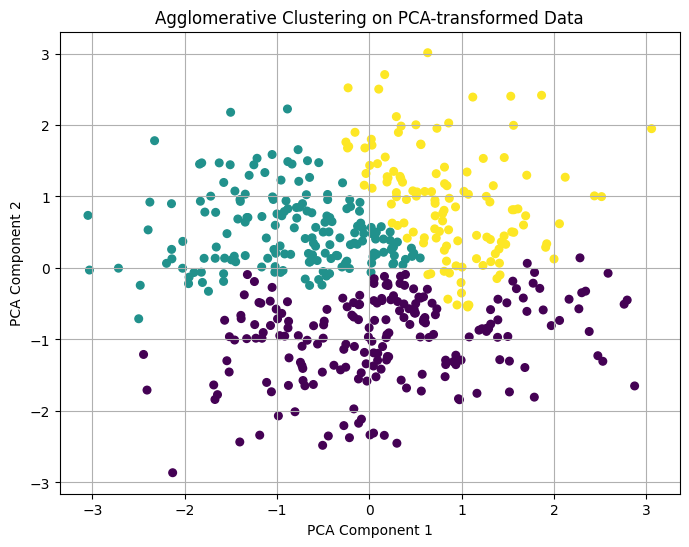

In [ ]:
# Visualizing Agglomerative Clustering on PCA-transformed data

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap="viridis", s=30)
plt.title("Agglomerative Clustering on PCA-transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### Conclusion:

- Agglomerative Clustering also gave three clusters, but they look a bit different compared to KMeans.
- The clusters here are a bit more spread out, especially vertically, which makes sense since it builds clusters by merging them based on how close they are.

## DBSCAN

In [ ]:
# Applying DBSCAN for clustering

DBSCAN = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = DBSCAN.fit_predict(X_pca)

In [ ]:
# Adding DBSCAN labels to the DataFrame for analysis

dbscan_labels = pd.Series(dbscan_labels, name="DBSCAN Clusters")
dbscan_labels.value_counts()

DBSCAN Clusters
 0    480
-1     20
Name: count, dtype: int64

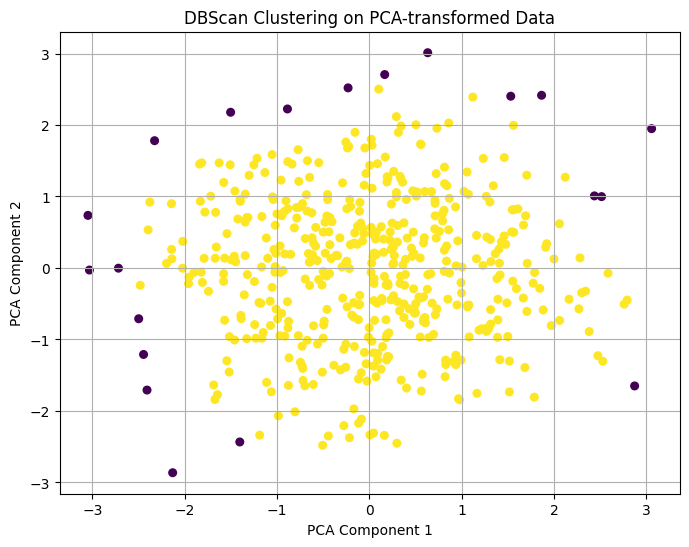

In [ ]:
# Visualizing DBScan clustering on PCA-transformed data

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="viridis", s=30)
plt.title("DBScan Clustering on PCA-transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### Conclusion:

- DBSCAN only gives 2 clusters.
- Which means that it is not sutiable for this PCA Transformed case.

## Conlusion:

- Out of the three, KMeans gave the most clear and balanced clusters for this dataset. The groups it formed were nicely separated and looked pretty well-distributed after applying PCA, which suggests it worked well here. 
- Agglomerative clustering gave a different view, and while the clusters weren’t as crisp, it still showed some structure — which makes sense since it builds clusters step by step based on closeness. 
- DBSCAN didn’t do great in this case, probably because the data wasn’t dense enough after PCA. It’s still a good method in general, just not the best match for this dataset.